## Übung 1.1

### 1.1.1

#### Ausführung von Ping zu unterschiedlichen Hosts

Zu den unterschiedlichen Hosts wird jeweils n-mal ein Ping durchgeführt und die Ausgabe in ein Tupel mit dem dazugehörigen Hostnamen gespeichert.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [2]:
import subprocess

hosts = ('uni-due.de', 'whitehouse.gov', 'icmp.org')
log = []
for host in hosts:
    process = subprocess.Popen(['ping', '-c', "50", host], stdout=subprocess.PIPE)
    for line in process.stdout:
        # die zeile ist ein raw string, muss also dekodiert werden
        line = line.decode('utf-8')
        # in der zeile ist bereits ein zeilenumbruch vorhanden
        print(line, end='')
        log.append((host, line))

PING uni-due.de (132.252.185.170) 56(84) bytes of data.
64 bytes from uni-due.de (132.252.185.170): icmp_seq=1 ttl=126 time=0.550 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=2 ttl=126 time=0.323 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=3 ttl=126 time=0.322 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=4 ttl=126 time=0.278 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=5 ttl=126 time=0.375 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=6 ttl=126 time=0.306 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=7 ttl=126 time=0.347 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=8 ttl=126 time=0.366 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=9 ttl=126 time=0.291 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=10 ttl=126 time=0.322 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=11 ttl=126 time=0.346 ms
64 bytes from uni-due.de (132.252.185.170): icmp_seq=12 ttl=126 time=0.343 ms
64 bytes from uni

#### Parsen der Rohdaten

Die Angabe der Round trip time ist gegeben durch z.B. den Text `time=166 ms`. Dieser kann durch einen regulären Ausdruck aus einer Zeile gefiltert werden.

In [3]:
import re

data = []
for host, line in log:
    # Der regulaere Ausdruck findet Zeitangaben (time=) bei Bedarf durch . getrennt
    m = re.search('time=(\d+(\.\d+)?)', line)
    if m:
        groups = m.groups()
        time = float(groups[0])
        data.append((host, time))
print(data)

[('uni-due.de', 0.55), ('uni-due.de', 0.323), ('uni-due.de', 0.322), ('uni-due.de', 0.278), ('uni-due.de', 0.375), ('uni-due.de', 0.306), ('uni-due.de', 0.347), ('uni-due.de', 0.366), ('uni-due.de', 0.291), ('uni-due.de', 0.322), ('uni-due.de', 0.346), ('uni-due.de', 0.343), ('uni-due.de', 0.306), ('uni-due.de', 0.287), ('uni-due.de', 0.292), ('uni-due.de', 0.364), ('uni-due.de', 0.336), ('uni-due.de', 0.349), ('uni-due.de', 0.403), ('uni-due.de', 0.29), ('uni-due.de', 0.293), ('uni-due.de', 0.291), ('uni-due.de', 0.311), ('uni-due.de', 0.286), ('uni-due.de', 0.295), ('uni-due.de', 0.311), ('uni-due.de', 0.304), ('uni-due.de', 0.377), ('uni-due.de', 0.354), ('uni-due.de', 0.347), ('uni-due.de', 0.298), ('uni-due.de', 0.283), ('uni-due.de', 0.348), ('uni-due.de', 0.353), ('uni-due.de', 0.343), ('uni-due.de', 0.346), ('uni-due.de', 0.374), ('uni-due.de', 0.327), ('uni-due.de', 0.29), ('uni-due.de', 0.422), ('uni-due.de', 0.321), ('uni-due.de', 0.338), ('uni-due.de', 0.329), ('uni-due.de'

#### Statistiken zum Ping

In der Aufgabenstellung war z.B. nach dem Mittelwert und der Varianz gefragt. Gerade bei der Varianz ergaben sich Schwierigkeiten. 

Wikipedia:

> Sie beschreibt die erwartete quadratische Abweichung der Zufallsvariablen von ihrem Erwartungswert.

Zum Erwartungswert ist eine entsprechende Quellenangabe vorhanden. Ansonsten ist folgendes Video zu empfehlen:
[Zufallsgröße, Erwartungswert, Faires Spiel, ...](https://www.youtube.com/watch?v=7zJ3GYBVU6Q)

Da im Beispiel alle Möglichkeiten und deren Wahrscheinlichkeit bekannt sind kann der Erwartungswert einfach bestimmt werden: $\sum_{i \in I} x_i P(X = x_i)$

Da hier aber nicht von bekannten möglichen Werten ausgegangen wird ist eine [unkorrigierte Stichprobenvarianz](https://de.wikipedia.org/wiki/Stichprobenvarianz) das Mittel der Wahl.

$s^2 = \frac{1}{n - 1} \sum_{i = 1}^n (x_i - \overline{x})^2$

In [4]:
import itertools

# Die zu gruppierenden Daten muessen zunaechst nach demselben Schluessel
# sortiert werden, siehe http://stackoverflow.com/questions/773/how-do-i-use-pythons-itertools-groupby
data = sorted(data, key=lambda t: t[0])
for host, g in itertools.groupby(data, key=lambda t: t[0]):

    rtt = [e[1] for e in g]
    max_rtt = max(rtt)
    min_rtt = min(rtt)
    
    # alternativer durchschnitt: sum(rtt) / len(rtt)
    # aber achtung vor rundungsfehlern!
    mean_rtt = np.mean(rtt) 
    
    # zur varianzberechnung siehe 
    # http://www.frustfrei-lernen.de/mathematik/varianz-berechnen.html
    variance = 1 / (len(rtt) - 1) * sum([np.power(x - mean_rtt, 2) for x in rtt])
    
    # die standardvarianz ist die wurzel der varianz
    std_deviation = np.sqrt(variance)
    
    print('              Host: %s' % host)
    print('           Max RTT: %f' % max_rtt)
    print('           Min RTT: %f' % min_rtt)
    print('  Durchschnitt RTT: %f' % mean_rtt)
    print('           Varianz: %f' % variance)
    print('Standardabweichung: %f' % std_deviation)
    print()

              Host: icmp.org
           Max RTT: 203.000000
           Min RTT: 162.000000
  Durchschnitt RTT: 177.380000
           Varianz: 100.403673
Standardabweichung: 10.020163

              Host: uni-due.de
           Max RTT: 0.550000
           Min RTT: 0.269000
  Durchschnitt RTT: 0.330800
           Varianz: 0.002079
Standardabweichung: 0.045591

              Host: whitehouse.gov
           Max RTT: 7.730000
           Min RTT: 7.510000
  Durchschnitt RTT: 7.583800
           Varianz: 0.001493
Standardabweichung: 0.038645



#### Anzeige eines Histograms

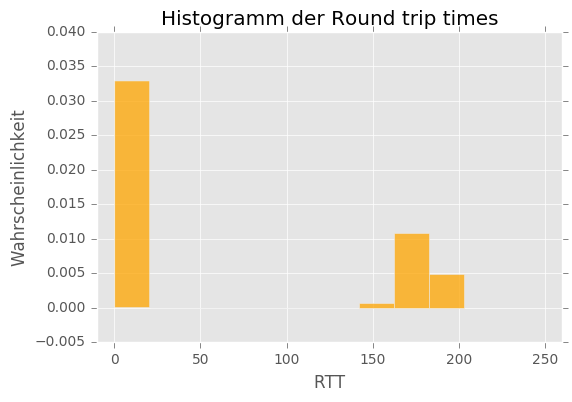

In [5]:
import matplotlib.pyplot as plt

times = [e[1] for e in data]
plt.hist(times, 10, normed=1, facecolor='orange', alpha=0.75)

plt.xlabel('RTT')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Histogramm der Round trip times')
plt.grid(True)

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .005, y_max + .005))

plt.show()

#### ECDF

Zur Hilfe zu empirischen kumulativen Distributionsfunktionen haben die Wirtschaftswissenschaftler auch eine schöne Hilfe:

- https://www.youtube.com/watch?v=EtyAsjzifZU
- https://onlinecourses.science.psu.edu/stat464/node/84

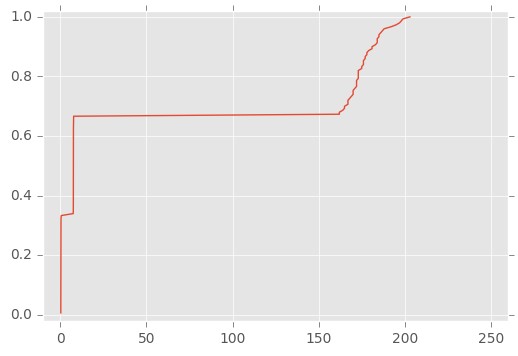

In [6]:
xs = sorted(times)
ys = np.arange(1, len(xs) + 1) / float(len(xs))

# help(np.arange)
# print(ys)

# arr = np.arange(1, 4) = [1, 2, 3]
# Der Rückgabetype ist np.ndarray

# arr / float(2) = [ 0.5,  1. ,  1.5]
# Durch den Divisor wird jeder Wert des Arrays geteilt (nicht möglich bei list/tuple)

plt.plot(xs, ys)

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

plt.show()

### 1.1.2

Es sollte simuliert werden wie die Gesamtverlustwahrscheinlichkeit bei einer zweiteiligen Strecke mit jeweils Teilverlustwahrscheinlichkeiten von $p_{ab} = 1\%$ und $p_{bc} = 2\%$ sind. Über einen Ereignisbaum kann man sich das ganz gut bildlich vorstellen.

Insgesamt bestehen $100^2$ Möglichkeiten. Bei einer von 100 Möglichkeiten geht das Paket auf der ersten Teilstrecke verloren. Nach jeder dieser 100 Möglichkeiten gibt es noch einmal 100 Möglichkeiten in denen das Paket verloren gehen kann. Am ersten Baum gibt es eine Möglichkeit des Paketverlustes. Daraus folgen für die Gesamtverlustwahrscheinlichkeit 100 Fehlschläge. Für jede andere der 99 Möglichkeiten gibt es 2 Möglichkeiten in denen das Paket widerum verloren gehen kann.

Demzufolge ist die Gesamtwahrscheinlichkeit die Wahrscheinlichkeit der ersten Strecke (0.01) plus die Wahrscheinlichkeit der zweiten Strecke (0.02) minus der Anteil der auf der ersten Strecke eh schon in die Hose geht.

Siehe: http://www.mathematik-wissen.de/mehrstufige_zufallsexperimente.htm

Bei n Teilstrecken beträgt also die Gesamtverlustwahrscheinlichkeit immer die Teilverlustwahrscheinlichkeit des Vorgängers + diese Teilverlustwahrscheinlichkeit * (1 - Teilverlustwahrscheinlichkeit des Vorgängers)

$P(X) = \sum_{i = 1}^{n} P(x_{i}) * (1 - P(x_{i - 1}))$

wobei gilt $P(1) = P(1)$ (basiert also nicht auf dem Vorgänger)

In [7]:
import random

iterations = (100, 1000, 10000, 1000000)
loss_ab = 0.01
loss_bc = 0.02

for i in iterations:
    # 0 <= random.random() < 1
    # 1 fuer pakete, die erfolgreich sind, 0 fuer fehlschlaege
    # filterung a -> b
    pakets = [1 if random.random() >= loss_ab else 0 for x in range(0, i)]
    # filterung b -> c
    pakets = [1 if random.random() >= loss_bc and p else 0 for p in pakets]
    
    print('Verlust: {:3.4f}% bei {:8d} Paketen'.format((1 - float(sum(pakets)) / i) * 100, i))
    
print('\nBei einem kalkulierten Verlust von: {:3.4f}%'.format((0.01 + 0.02 * (1 - 0.01)) * 100))
    

Verlust: 5.0000% bei      100 Paketen
Verlust: 2.9000% bei     1000 Paketen
Verlust: 3.0200% bei    10000 Paketen
Verlust: 3.0075% bei  1000000 Paketen

Bei einem kalkulierten Verlust von: 2.9800%


Sollten n beliebige Strecken mit gegebenen Verlustwahrscheinlichkeiten gegeben sein, kann die folgende Methode verwendet werden:

In [8]:
def loss(p_i):
    p_i = list(p_i)
    if len(p_i) < 2:
        return p_i[0]
    
    _p = []
    # P(0) hinzufuegen
    _p.append(p_i[0])
    
    for i in range(1, len(p_i)):
        # alle anderen wahrscheinlichkeiten basieren auch auf dem vorgaenger
        _p.append(p_i[i] * (1 - sum(_p)))
        
    return sum(_p)

print(loss((0.01, 0.02)))
print(loss((0.5, 0.4, 0.3, 0.2)))

0.0298
0.832


### 1.1.3

Es sollen exponentiell verteilte Werte in Abhängigkeit von einem gegebenen Mittelwert generiert und in einer CDF dargestellt werden. Diese Werte lassen sich mit Hilfe der Funktion $R_e = -\mu * log(R_u)$ generieren.

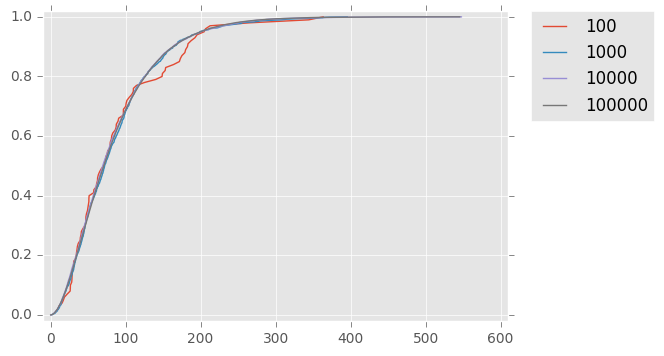

In [9]:
import math
import random
    
mu_ab = 42
mu_bc = 42
counts = (100, 1000, 10000, 100000)
delay = {
    'ab': [],
    'bc': []
}
data = []
# fuer jede teilstrecke werden zufallswerte bestimmt
# Beispiel: delay['ab'] = [[1.0, 42.3, 60.1, 34.3], [...], [...], [..]] (numpy array!)
for count in counts:
    delay['ab'].append(np.array([-mu_ab * math.log(random.uniform(0, 1)) for i in range(0, count)]))
    delay['bc'].append(np.array([-mu_bc * math.log(random.uniform(0, 1)) for i in range(0, count)]))
    

# In Python werden arrays durch addition zusammengefuegt
# [1, 2] + [3, 4] = [1, 2, 3, 4]
# es soll aber jede verzoegerung a -> b -> c addiert werden, daher werden
# numpy arrays verwendet.
# np.array([1, 2]) + np.array([3, 4]) = [4, 6]
# Beispiel: data = [([1.0, 42.3, 60.1, 34.3], 100), [...], [...], [..]]
# ..Liste von 2-Tupeln bestehend aus einem numpy array und dem dazugehoerigen label
data = [(delay['ab'][i] + delay['bc'][i], counts[i]) for i in range(0, len(counts))]

for values, label in data:
    # sortieren der werte zur darstellung als cdf
    xs = sorted(values)
    # erstellen der gleichmaeszigen werte fuer die y-achse
    ys = np.arange(1, len(xs) + 1) / float(len(xs))
    
    plt.plot(xs, ys, label=label)

# hinzufuegen einer legende. label muss vorher durch plt.plot gegeben sein
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# padding hinzufuegen
x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

plt.show()

Zur Veranschaulichung werden die Daten noch einmal als Histogramm dargestellt.

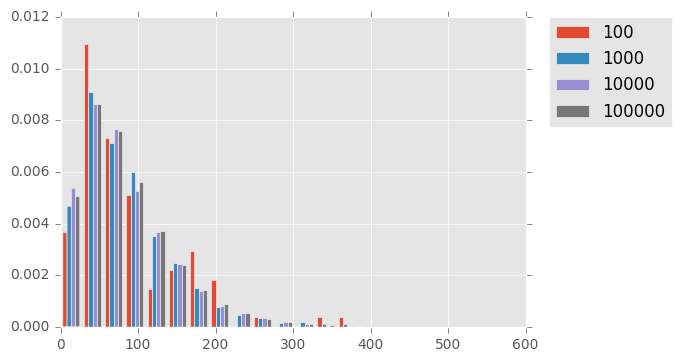

In [10]:
import math
import random
    
plt.hist([d[0] for d in data], bins=20, normed=True, label=[d[1] for d in data])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

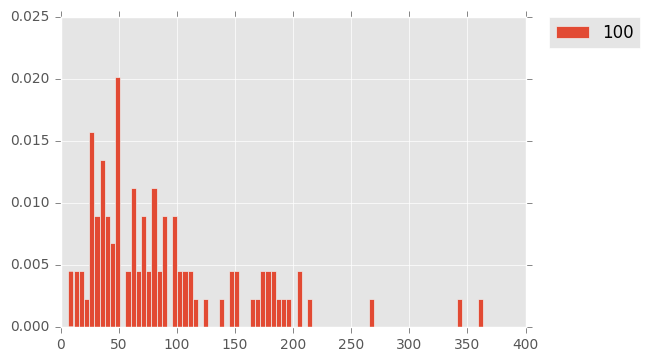

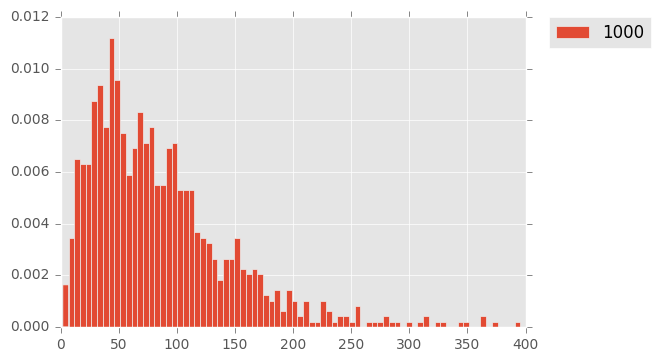

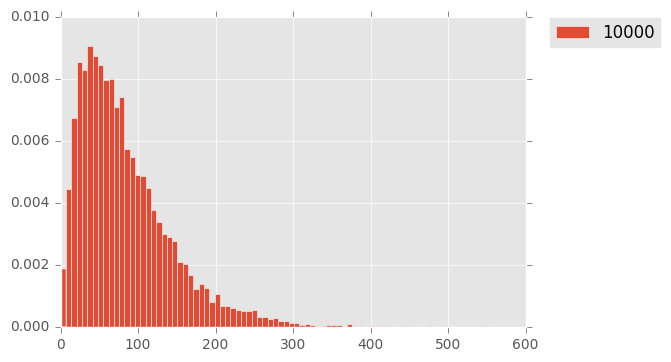

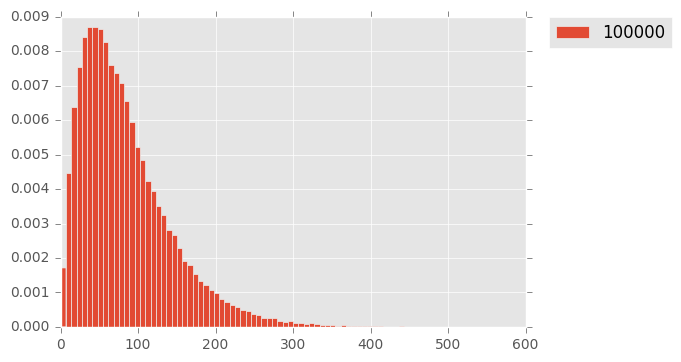

In [11]:
for i in range(0, len(counts)):
    xs, label = delay['ab'][i] + delay['bc'][i], str(counts[i])
    plt.hist(xs, bins=80, normed=True, label=label)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

#### Vergleich mit einer Erlangverteilung

Die Verteilungsfunktion der Erlangverteilung ist: $P(D_{ABC} \leq x) = 1 - e^{-gx}(1 + gx)$ mit $g = \frac{1}{\mu_{AB}}$

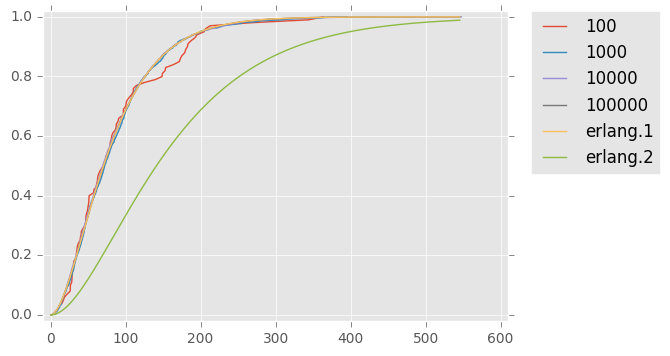

In [12]:
# plotten der werte wie zuvor zum vergleich mit den erlang verteilungen
for values, label in data:
    xs = sorted(values)
    ys = np.arange(1, len(xs) + 1) / float(len(xs))
    
    plt.plot(xs, ys, label=label)

# erzeugen der gleichmaeszigen x werte fuer die erlang verteilung <=> min <= x <= max
# des letzten elementes
e_x = np.linspace(min(data[-1][0]), max(data[-1][0]), len(data[-1][0]))
e_y = {
    'erlang.1': [1 - math.exp(-1 / mu_ab * i) * (1 + 1 / mu_ab * i) for i in e_x],
    'erlang.2': [1 - math.exp(-1 / (2 * mu_ab) * i) * (1 + 1 / (2 * mu_ab) * i) for i in e_x]
}

for label in e_y:
    plt.plot(e_x, e_y[label], label=label)

# hinzufuegen einer legende. label muss vorher durch plt.plot gegeben sein
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# padding hinzufuegen
x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

plt.show()

### 1.1.4

#### Frage 1

- Versendung von Sequenznummern mit den Paketen, die nach der Rücksendung verglichen werden

#### Frage 2

- Verfügbare Bandbreite
- Anzahl der Verbindungen zu anderen Knoten
- Resourcenkapazität
- Uptime des Rechners
- mobile Knoten (Akku betrieben)

#### Frage 3

- Regelung der Bandbreite
- Ermittlung von neuen Supernodes
- Paketweiterleitung *am Nutzer vorbei*

#### Frage 4

Supernodes bilden ein Overlay, da Sie den Datenverkehr an die Klienten regeln und anderen Supernode bekannt sind. Erst durch Supernodes wird das eigentlich Netz realisiert.


#### ECDF-Beispiel

Siehe [Wikipedia Empirische Verteilungsfunktion](https://de.wikipedia.org/wiki/Verteilungsfunktion#Empirische_Verteilungsfunktion>)

Ausgangsdaten:
6, 2, 7, 12, 1, 11, 1, 1, 2, 3

sort:
1, 1, 1, 2, 2, 3, 6, 7, 11, 12

table:

1  2  3  6  7  11  12
3  2  1  1  1  1   1

cumsum   3  5  6  7  8  9   10
/10      .3 .5 .6 .7 .8 .9  .10

